In [ ]:
!pip install torchtext==0.6.0

### Prepare ETF data for transformer

In [ ]:
%autosave 60
import pandas as pd

Autosaving every 60 seconds


In [ ]:
df = pd.read_csv("ETF prices.csv")

In [ ]:
# show column names
df.columns

Index(['fund_symbol', 'price_date', 'open', 'high', 'low', 'close',
       'adj_close', 'volume'],
      dtype='object')

In [ ]:
# convert date
df['price_date'] = pd.to_datetime(df['price_date'])

In [ ]:
# change column name
df = df.rename(columns = {"fund_symbol": "fund", "price_date": "date", "adj_close": "adjClose"})

# Convert numeric columns to float (if necessary)
numeric_cols = df.select_dtypes(include=['number']).columns

# Round numeric columns to two decimals
df[numeric_cols] = df[numeric_cols].round(2)

In [ ]:
# show column types
df.dtypes

fund                object
date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
adjClose           float64
volume               int64
dtype: object

In [ ]:
print(df)

        fund       date   open   high    low  close  adjClose  volume
0        AAA 2020-09-09  25.10  25.12  25.07  25.07     24.85   17300
1        AAA 2020-09-10  25.06  25.07  25.05  25.07     24.85   23500
2        AAA 2020-09-11  25.04  25.05  25.02  25.03     24.81   33400
3        AAA 2020-09-14  25.01  25.06  25.01  25.02     24.80   13100
4        AAA 2020-09-15  25.02  25.03  25.01  25.01     24.79   12100
...      ...        ...    ...    ...    ...    ...       ...     ...
3866025  ZSL 2021-11-23  26.81  27.21  26.30  26.35     26.35  190900
3866026  ZSL 2021-11-24  26.79  26.96  26.57  26.69     26.69  109000
3866027  ZSL 2021-11-26  26.67  28.14  26.67  27.72     27.72  205500
3866028  ZSL 2021-11-29  27.89  28.56  27.80  28.27     28.27  411900
3866029  ZSL 2021-11-30  28.15  28.73  25.91  28.49     28.49  219400

[3866030 rows x 8 columns]


In [ ]:
dfTest = df.copy()
df = df[df['fund'] == 'AAA'][['open', 'high', 'low', 'close', 'adjClose']]
dfTest = dfTest[dfTest['fund'] == 'SPY'][['open', 'high', 'low', 'close', 'adjClose']]

In [ ]:
print(df)
print(dfTest)

      open   high    low  close  adjClose
0    25.10  25.12  25.07  25.07     24.85
1    25.06  25.07  25.05  25.07     24.85
2    25.04  25.05  25.02  25.03     24.81
3    25.01  25.06  25.01  25.02     24.80
4    25.02  25.03  25.01  25.01     24.79
..     ...    ...    ...    ...       ...
305  25.04  25.04  25.02  25.03     25.03
306  25.03  25.04  25.02  25.02     25.02
307  25.04  25.04  25.02  25.02     25.02
308  25.02  25.03  25.02  25.03     25.03
309  25.04  25.04  25.04  25.04     25.04

[310 rows x 5 columns]
           open    high     low   close  adjClose
3262244   43.97   43.97   43.75   43.94     25.80
3262245   43.97   44.25   43.97   44.25     25.98
3262246   44.22   44.38   44.12   44.34     26.04
3262247   44.41   44.84   44.38   44.81     26.31
3262248   44.97   45.09   44.47   45.00     26.42
...         ...     ...     ...     ...       ...
3269502  467.22  469.10  464.45  468.19    468.19
3269503  466.06  469.57  465.19  469.44    469.44
3269504  462.34  463.9

In [ ]:
df['mean'] = df.mean(axis=1)
df = df[['mean']]

dfTest['mean'] = dfTest.mean(axis=1)
dfTest = dfTest[['mean']]

In [ ]:
print(df)
print(dfTest)

       mean
0    25.042
1    25.020
2    24.990
3    24.980
4    24.972
..      ...
305  25.032
306  25.026
307  25.028
308  25.026
309  25.040

[310 rows x 1 columns]
            mean
3262244   40.286
3262245   40.484
3262246   40.620
3262247   40.950
3262248   41.190
...          ...
3269502  467.430
3269503  467.940
3269504  460.390
3269505  464.312
3269506  458.490

[7263 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Training the model...
Epoch [1/20], Avg Loss: 602.0486
Epoch [2/20], Avg Loss: 545.5426
Epoch [3/20], Avg Loss: 476.1661
Epoch [4/20], Avg Loss: 399.3801
Epoch [5/20], Avg Loss: 320.9098
Epoch [6/20], Avg Loss: 245.9135
Epoch [7/20], Avg Loss: 178.5441
Epoch [8/20], Avg Loss: 121.7028
Epoch [9/20], Avg Loss: 76.9305
Epoch [10/20], Avg Loss: 44.3781
Epoch [11/20], Avg Loss: 22.8910
Epoch [12/20], Avg Loss: 10.3019
Epoch [13/20], Avg Loss: 3.9337
Epoch [14/20], Avg Loss: 1.2368
Epoch [15/20], Avg Loss: 0.3114
Epoch [16/20], Avg Loss: 0.0626
Epoch [17/20], Avg Loss: 0.0119
Epoch [18/20], Avg Loss: 0.0043
Epoch [19/20], Avg Loss: 0.0034
Epoch [20/20], Avg Loss: 0.0034
Finished Training



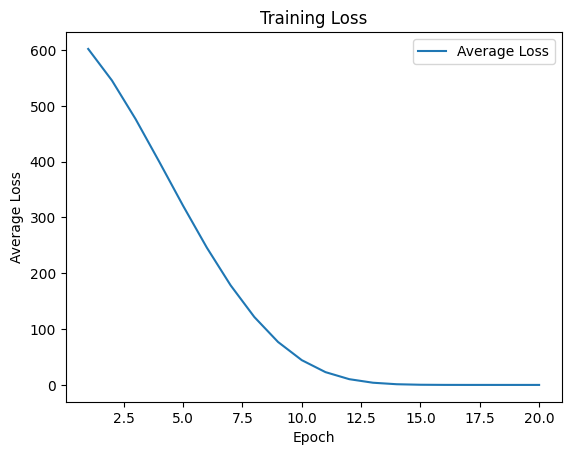


Test Loss: 22509.3808


In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import math
import torch.optim as optim
import matplotlib.pyplot as plt
from torchtext import data


# Defined transformer model
# =====================================================================
class TransformerModel(nn.Module):
    def __init__(self, input_dim, d_model, nhead, num_encoder_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_encoder_layers)
        self.transformer_encoder.embed_dim = d_model  # Set the embed_dim attribute
        self.fc = nn.Linear(d_model, 1)  # Adjusted linear layer input dimension

    def forward(self, src, src_mask=None):
        src = self.transformer_encoder(src, src_mask)
        src = src.mean(dim=1)  # Aggregate sequence to a single vector along the sequence dimension
        src = self.fc(src)
        return src.squeeze(-1)  # Squeeze to remove the extra dimension


# Initialized weights, implemented positional encoding, and incorporated masking
# =================================================================================
class TransformerEncoderLayer(nn.Module):
    def __init__(self, d_model, nhead, dim_feedforward=2048, dropout=0.1):
        super(TransformerEncoderLayer, self).__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead)
        self.linear1 = nn.Linear(d_model, dim_feedforward)
        self.dropout = nn.Dropout(dropout)
        self.linear2 = nn.Linear(dim_feedforward, d_model)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout1 = nn.Dropout(dropout)
        self.dropout2 = nn.Dropout(dropout)

    def forward(self, src, src_mask=None):
        src2 = self.self_attn(src, src, src, attn_mask=src_mask)[0]
        src = src + self.dropout1(src2)
        src = self.norm1(src)
        src2 = self.linear2(self.dropout(F.relu(self.linear1(src))))
        src = src + self.dropout2(src2)
        src = self.norm2(src)
        return src

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(p=0.1)

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0).transpose(0, 1)
        self.register_buffer('pe', pe)

    def forward(self, x):
        x = x + self.pe[:x.size(0), :]
        return self.dropout(x)

def init_weights(module):
    if isinstance(module, (nn.Linear, nn.Conv2d)):
        init.xavier_uniform_(module.weight.data)
        if module.bias is not None:
            module.bias.data.fill_(0.01)


# Tokenize data, built vocabulary, created batches, and created input and target sequences.
# ========================================================================================
epochs = []
avg_losses = []

TEXT = data.Field(tokenize=lambda x: x, use_vocab=True, batch_first=True)
LABEL = data.Field(sequential=False, use_vocab=False, dtype=torch.float)

class CustomDataset(data.Dataset):
    def __init__(self, df, text_field, label_field):
        fields = [('text', text_field), ('label', label_field)]
        examples = []
        for i, row in df.iterrows():
            text = [str(val) for val in row.values]
            label = row['mean']
            examples.append(data.Example.fromlist([text, label], fields))
        super().__init__(examples, fields)

train_data = CustomDataset(df, TEXT, LABEL) # Create dataset instances
test_data = CustomDataset(df, TEXT, LABEL)

TEXT.build_vocab(train_data)  # Build vocabulary

BATCH_SIZE = 1
train_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, test_data),
    batch_size=BATCH_SIZE,
    sort_key=lambda x: len(x.text),
    shuffle=True
)

for batch in train_iterator:
    input_sequence = batch.text  # Input sequence tensor
    target_sequence = batch.label  # Target sequence tensor


# Initated an instance of the model
# =====================================================================
input_dim = 1  # Dimension of input features (mean)
d_model = 1  # Hidden dimension of the transformer model
nhead = 1  # Number of attention heads
num_encoder_layers = 3  # Number of transformer encoder layers
dropout = 0.1  # Dropout rate for transformer layers
max_len = 10000  # Adjust based on the maximum sequence length in your data

model = TransformerModel(input_dim, d_model, nhead, num_encoder_layers, dropout)
model.apply(init_weights)

encoder_layer = TransformerEncoderLayer(d_model, nhead)
positional_encoder = PositionalEncoding(d_model, max_len)
model.encoder = nn.Sequential(encoder_layer, positional_encoder)


# Ran the model
# =====================================================================
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20 # Number of training epochs

# training the model
# ===================
print("\nTraining the model...")
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch in train_iterator:
        optimizer.zero_grad()
        input_sequence = batch.text.float()  # Convert input data to float type if needed
        target_sequence = batch.label.float()  # Convert target data to float type if needed

        output = model(input_sequence)
        loss = criterion(output, target_sequence)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_iterator)
    epochs.append(epoch+1)
    avg_losses.append(avg_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Avg Loss: {avg_loss:.4f}')

print('Finished Training\n')

# Plotting
plt.plot(epochs, avg_losses, label='Average Loss')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


# Evaluate the model on the test set
# ====================================================================
test_data = CustomDataset(dfTest, TEXT, LABEL)
test_iterator = data.BucketIterator(test_data, batch_size=BATCH_SIZE, shuffle=False)


# Evaluate on test data
model.eval()
total_loss = 0.0
predictions = []
ground_truths = []

with torch.no_grad():
  for batch in test_iterator:
    input_sequence = batch.text.float()
    target_sequence = batch.label.float()

    output = model(input_sequence)
    loss = criterion(output, target_sequence)
    total_loss += loss.item()

    predictions.append(output.squeeze(0).tolist())  # Collect predictions
    ground_truths.extend(target_sequence.tolist())  # Collect ground truth values

avg_test_loss = total_loss / len(test_iterator)
print(f'\nTest Loss: {avg_test_loss:.4f}')